In [142]:
import numpy as np
import matplotlib.pyplot as plt

In [143]:
# Define the initial conditions
nx = 128
dx = 2 / (nx - 1)
nt = 64
CFL = 0.1
dt = CFL * dx

In [144]:
# Define the conservative form of Burgers' equation
def burgers_con(u, dx, dt):
    un = u.copy()
    u[1:-1] = un[1:-1] - (dt / (2 * dx)) * un[1:-1] * (un[1:-1] - un[:-2])
    return u

In [145]:
# Define the non-conservative form of Burgers' equation
def burgers_noncon(u, dx, dt):
    un = u.copy()
    u[1:-1] = un[1:-1] - un[1:-1] * (dt / dx) * (un[1:-1] - un[:-2])
    return u

In [146]:
#Initial Conditions
u = np.ones(nx)
u[:int(0.5 / dx)] = 2

# Solve the conservative form of Burgers' equation
u_con = u.copy()
for n in range(nt):
    u_con = burgers_con(u_con, dx, dt)

In [147]:
# Solve the non-conservative form of Burgers' equation
u_noncon = u.copy()
for n in range(nt):
    u_noncon = burgers_noncon(u_noncon, dx, dt)

In [148]:
# Measure the shock speed
x = np.linspace(0, 2, nx)
t = nt * dt 
#for i in range(len(u_con)):
#    if (u_con[i] > 1 and u_con[i] < 2):
#        print(i)'''

#for i in range(len(u_noncon)):
#    if (u_noncon[i] > 1 and u_noncon[i] < 2):
#        print(i)
shock_speed_con = (u_con[31] - u_con[54]) / t
shock_speed_noncon = (u_noncon[31] - u_noncon[62]) / t

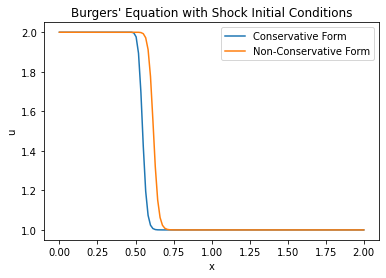

Shock speed using conservative form: 9.896671487441761
Shock speed using non-conservative form: 9.921860275621752


In [149]:
# Plot the results
plt.plot(x, u_con, label='Conservative Form')
plt.plot(x, u_noncon, label='Non-Conservative Form')
plt.xlabel('x')
plt.ylabel('u')
plt.title(f"Burgers' Equation with Shock Initial Conditions")
plt.legend()
plt.show()

print(f"Shock speed using conservative form: {shock_speed_con}")
print(f"Shock speed using non-conservative form: {shock_speed_noncon}")
